### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write up, download this file as a PDF or HTML file and submit in the next section.


(1) What is the independent variable? What is the dependent variable?

**Independent variable:** Type of word(Congruent or Incongruent)

**Dependent variable:** Time taken to name the color of the incongruent words(speed).

(2) What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.

**NULL HYPOTHESIS:** The reading speed for incongruent words is same.

**ALTERNATE HYPOTHESIS:** The reading speed for incongruent words is different.

$$ H_0: \mu _i = \mu _c$$
$$ H_1: \mu _i \neq \mu _c$$

Here $H_{0}$ and $H_{1}$ are the null and the alternative hypothesis respectively.

$\mu_{i}$ is the mean time for incongruent words and $\mu_{c}$ is the mean time for congruent words.

We will perform a t-test to see whether the difference in time for congruent and incongruent words is significantly different from zero.

We are using paired t-test because the group of participants are same and they are tested under two different cases. The t-statistic will also help in accepting or rejecting the alternative hypothesis.

**Assumption/Reasoning:** We are using t-test instead of z-test to compare the mean of two populations here because standard deviation of the populations is not known and the sample size is less than 30(here it is 24).

Another assumption to use t-test is that we consider the population to be a normal distribution.

(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [40]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import t

df = pd.read_csv("stroopdata.csv")

In [42]:
df

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803
5,12.238,20.878
6,14.692,24.572
7,8.987,17.394
8,9.401,20.762
9,14.480,26.282


In [43]:
df.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


In [44]:
df.shape[0]

24

Sample size = 24

Mean time for congruent words: 14.05

Mean time for incongruent words: 22.02

Standard deviation for this sample:

- congruent: 3.56

- incongruent: 4.80

In [45]:
df['Difference'] = abs(df.Congruent - df.Incongruent)
df.Difference.describe()

count    24.000000
mean      7.964792
std       4.864827
min       1.950000
25%       3.645500
50%       7.666500
75%      10.258500
max      21.919000
Name: Difference, dtype: float64

(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

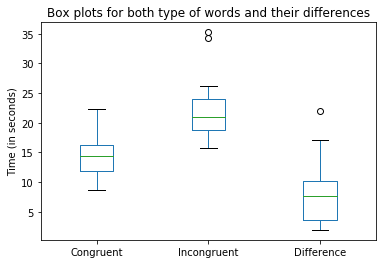

In [46]:
# Boxplots of two condition and difference
df.plot(title = "Box plots for both type of words and their differences", kind = "box")
y = plt.ylabel("Time (in seconds)")

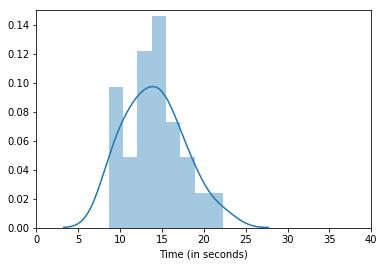

In [47]:
# distribution of congruent condition
sns.distplot(df['Congruent'], bins = 8);
plt.xlabel("Time (in seconds)");
plt.axis([0,40,0,0.15]);

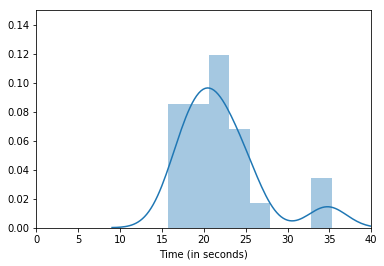

In [48]:
# distribution of incongruent condition
sns.distplot(df['Incongruent'], bins = 8);
plt.xlabel("Time (in seconds)");
plt.axis([0,40,0,0.15]);

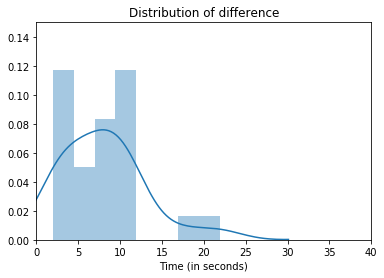

In [49]:
sns.distplot(df['Difference'], bins = 8);
plt.title("Distribution of difference");
plt.xlabel("Time (in seconds)");
plt.axis([0,40,0,0.15]);

All the above distributions are right skewed. Especially some observations in congruent condition which took long time.

(5) Now, perform the statistical test and report the results. What is the confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

**mean difference** d_bar = 7.96

**standard deviation** sd = 4.86

**standard error of the difference** SE(d_bar) = sd/square_root(n) = 4.86/(24^0.5) = 0.99

**t-statistic** = d_bar/SE(d_bar) = 7.96/0.99 = 8.04 on 23 degree of freedom

t-statistic is 8.04

Our alternative hypothesis is that difference in time between two types of words is different from zero. For this, we have used paired t-test.

We have taken alpha = 0.05 to decide statistical significance of the alternative.

Since our t-statistic (8.04) is greater than the critical value (1.71), we can reject the null hypothesis. This means that reading speed for different condition is different. This is what was expected. 

I learned the t-score formula from [here](http://www.statisticshowto.com/t-score-formula/). 